In [1]:
import torch
import numpy as np
from torch_geometric.datasets import ModelNet
from torch_geometric.transforms import SamplePoints, Compose, RandomRotate

In [2]:
transforms = Compose([SamplePoints(1024),RandomRotate((0,45), axis=0)])
data_train_ = ModelNet(root='../modelnet', name='40', train=True, transform=transforms)
data_test_ = ModelNet(root='../modelnet', name='40', train=False, transform=transforms)

mean = 512
sigma = 64

np.random.seed(0)
train_num_points = np.floor(sigma * np.random.randn(len(data_train_)) + mean).astype(int)
test_num_points = np.floor(sigma * np.random.randn(len(data_test_)) + mean).astype(int)

X_train_ = [data_train_[i].pos.numpy()[:train_num_points[i]] for i in range(len(data_train_))]
y_train = np.array([data_train_[i].y.numpy() for i in range(len(data_train_))]).squeeze()
X_test_ = [data_test_[i].pos.numpy()[:test_num_points[i]] for i in range(len(data_test_))]
y_test = np.array([data_test_[i].y.numpy() for i in range(len(data_test_))]).squeeze()

def normalize(data):
    normalized = []
    for sample in data:
        sample_min = sample.min(0)
        sample = sample - sample_min
        sample_max = sample.max()
        normalized.append(sample / sample_max)
    return normalized

X_train = normalize(X_train_)
X_test = normalize(X_test_)

In [3]:
import matplotlib.pyplot as plt

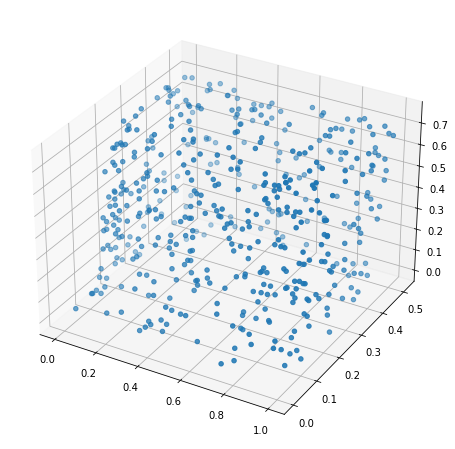

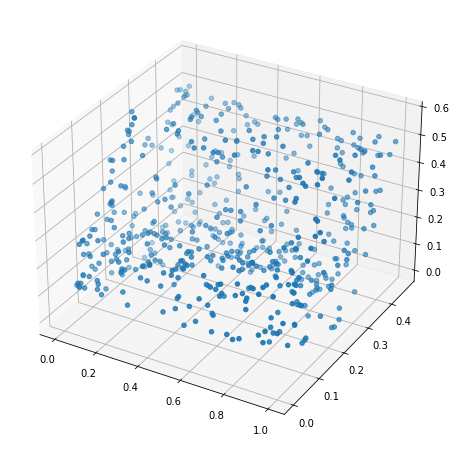

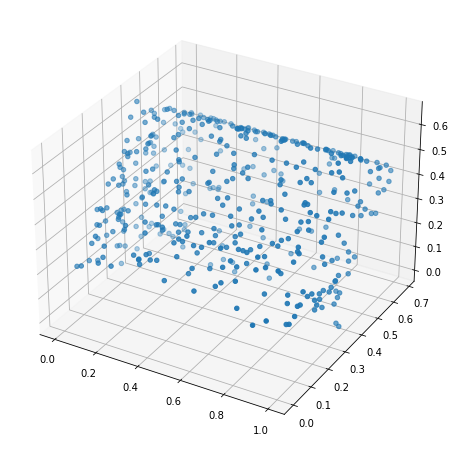

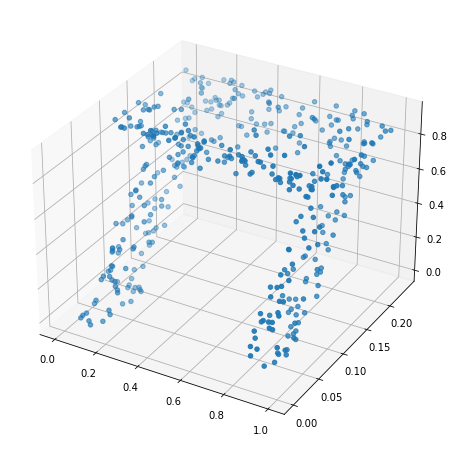

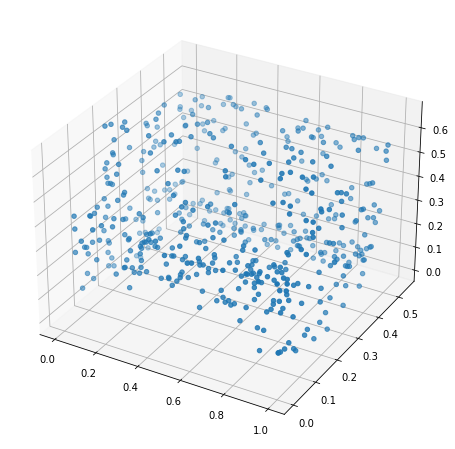

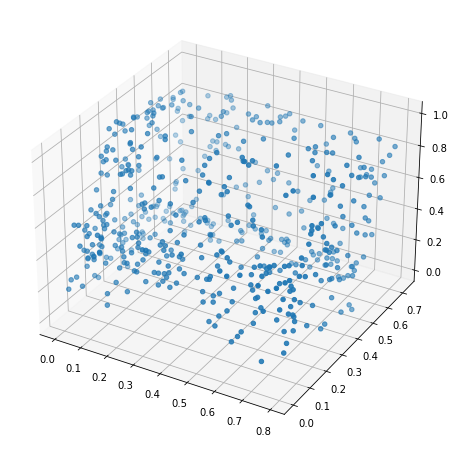

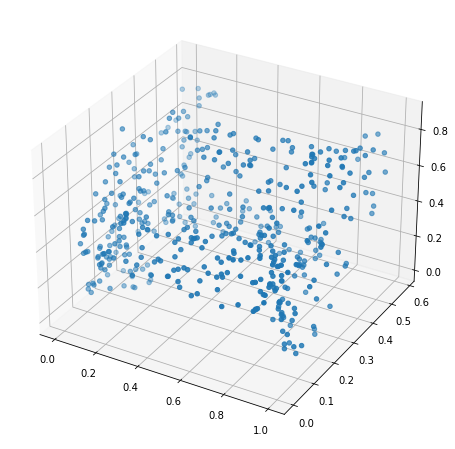

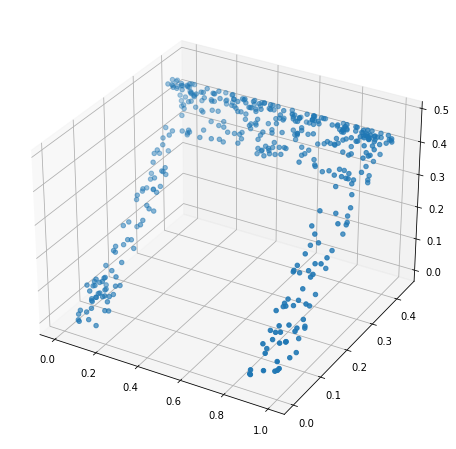

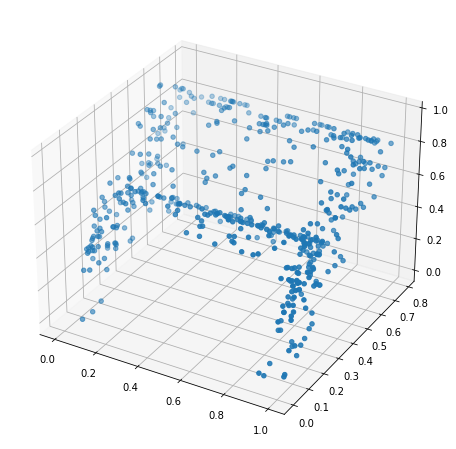

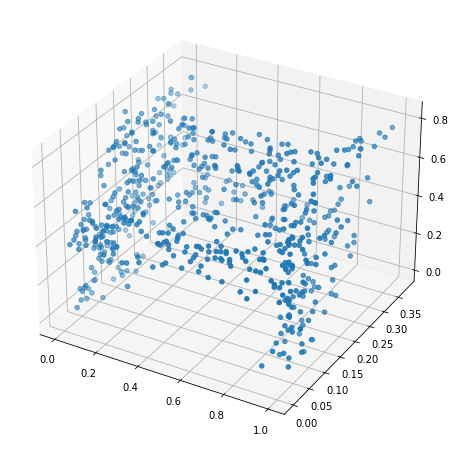

In [26]:
for i in range(5370,5380):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X_train[i][:,0],X_train[i][:,1], X_train[i][:,2])